# Task 1: Split the byte and ASM files in the path to reduce confusion (Please note to default the training dataset)

In [ ]:
import os
import shutil

#Define paths
pathRoot = r"E:\ML Kaggle dataset\malware-classification\train\train"   #Please replace with the root path
pathDestinationByte = r"E:\ML Kaggle dataset\malware-classification\train\train\Byte Data" #Please replace with the Byte path
pathDestinationASM = r"E:\ML Kaggle dataset\malware-classification\train\train\ASM Data" #Please replace with the ASM path

# Check if the path exists
if not os.path.exists(pathDestinationByte): # If it doesn't exist, create the directory
    os.makedirs(pathDestinationByte)
if not os.path.exists(pathDestinationASM): # If it doesn't exist, create the directory
    os.makedirs(pathDestinationASM)
    
if os.path.exists(pathRoot):
    files = os.listdir(pathRoot)           # List all files in the source directory
    asm_files = [f for f in files if f.endswith('.asm')]  # Filter out the .asm files
    byte_files = [f for f in files if f.endswith('.bytes')]
    # Check if .asm files are found
    count_asm = 0
    count_byte = 0
    if asm_files:
        for file in asm_files:
            file_path = os.path.join(pathRoot, file)
            destination_path = os.path.join(pathDestinationASM, file)
            shutil.move(file_path, pathDestinationASM)
            count_asm += 1
    if byte_files:
        for file in byte_files:
            file_path = os.path.join(pathRoot, file)
            destination_path = os.path.join(pathDestinationByte, file)
            shutil.move(file_path, pathDestinationByte)
            count_byte += 1
    print("Successfully transfered " + str(count_asm) + " asm and " + str(count_byte) + " byte files.")


# Task 2: Check the distribution of overall data

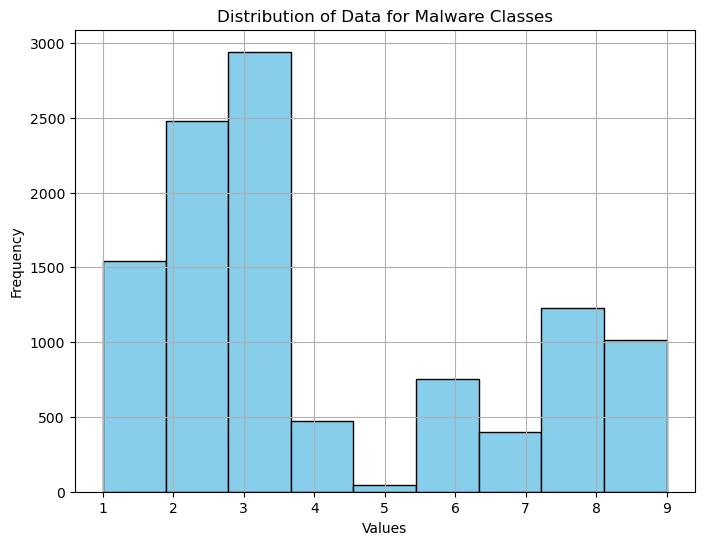

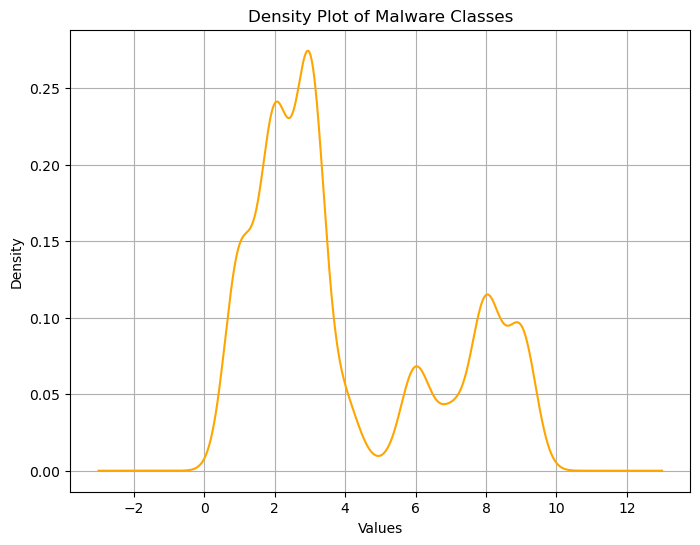

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pathLabel = r"E:\ML Kaggle dataset\malware-classification\trainLabels.csv"  #Please define your own path
dfLabel = pd.read_csv(pathLabel)

# Plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(dfLabel['Class'], bins=9, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Data for Malware Classes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a density plot (Kernel Density Estimate)
plt.figure(figsize=(8, 6))
dfLabel['Class'].plot(kind='density', color='orange')
plt.title('Density Plot of Malware Classes')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [2]:
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Input File for Byte

In [3]:
file = r"C:\Users\ashut\Desktop\Machine Learning\Input\result_with_size.csv"
byte_feature_all = pd.read_csv(file)

In [4]:
byte_feature_all.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,5.012695,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,6.556152,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,4.602051,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.679688,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.438965,8


# Split dataset to Train Test for Byte

In [5]:
from sklearn.model_selection import train_test_split

data_y = byte_feature_all['Class']
X_train, X_test, y_train, y_test = train_test_split(byte_feature_all.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)

# Model Building </br> </br>
## 1- Random Forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
random_forest.fit(X_train, y_train)

# Making predictions on the test set
predictions = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9857405703771849


In [7]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       308
           2       1.00      0.99      1.00       496
           3       1.00      1.00      1.00       588
           4       1.00      0.97      0.98        95
           5       0.89      1.00      0.94         8
           6       0.96      0.99      0.97       150
           7       0.99      0.97      0.98        80
           8       0.98      0.93      0.95       246
           9       0.99      1.00      0.99       203

    accuracy                           0.99      2174
   macro avg       0.97      0.98      0.98      2174
weighted avg       0.99      0.99      0.99      2174



<IPython.core.display.Javascript object>


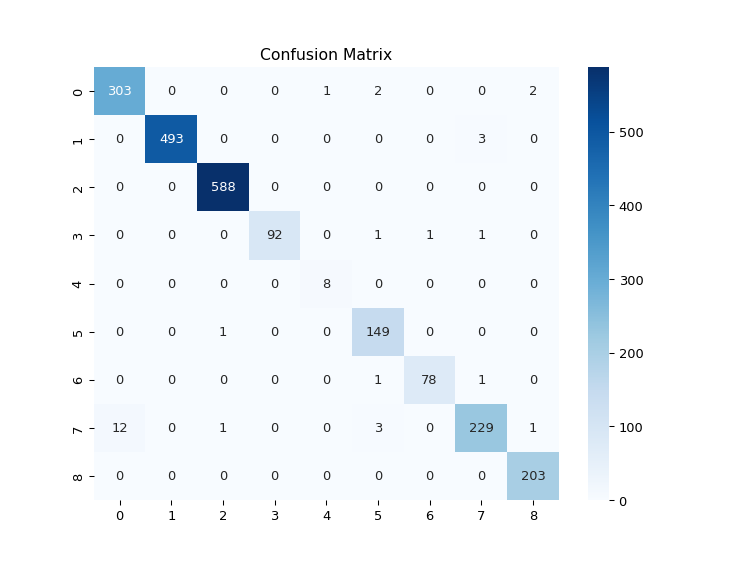

In [8]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 2- SVM

In [9]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)
predictions = SVM_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6913523459061638


In [10]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.34      0.94      0.50       308
           2       0.96      0.81      0.88       496
           3       0.99      1.00      0.99       588
           4       0.96      0.27      0.43        95
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00       150
           7       0.94      0.90      0.92        80
           8       0.46      0.26      0.33       246
           9       0.73      0.32      0.44       203

    accuracy                           0.69      2174
   macro avg       0.60      0.50      0.50      2174
weighted avg       0.73      0.69      0.67      2174



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


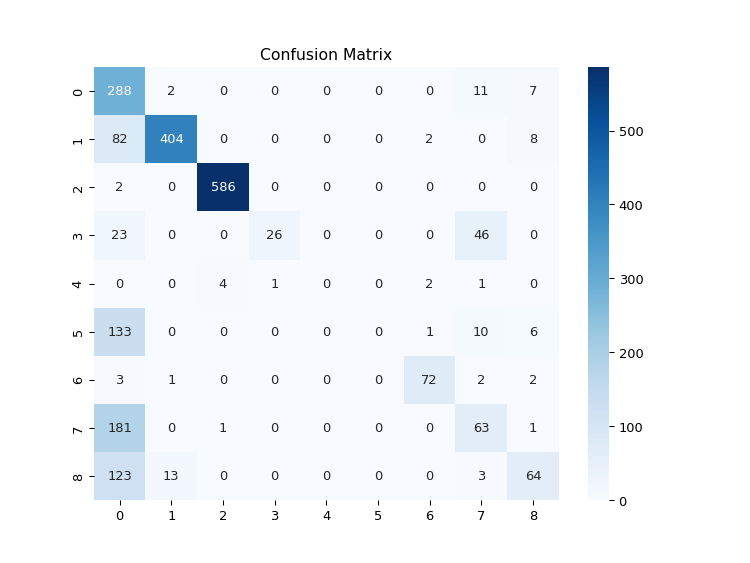

In [11]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 3- Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fitting the model to the training data
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
predictions = decision_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.954001839926403


In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       308
           2       0.98      0.96      0.97       496
           3       1.00      1.00      1.00       588
           4       1.00      0.93      0.96        95
           5       0.30      0.75      0.43         8
           6       0.91      0.87      0.89       150
           7       0.97      0.96      0.97        80
           8       0.92      0.92      0.92       246
           9       0.93      0.98      0.95       203

    accuracy                           0.95      2174
   macro avg       0.88      0.92      0.89      2174
weighted avg       0.96      0.95      0.96      2174



<IPython.core.display.Javascript object>


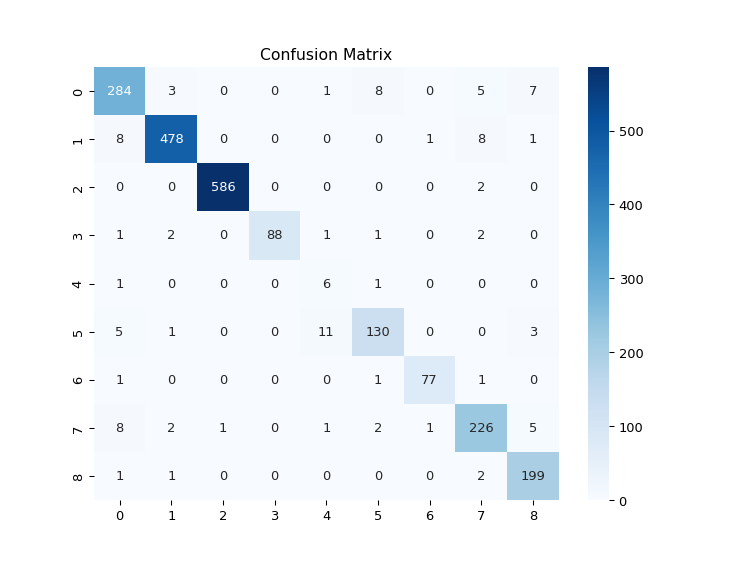

In [14]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 4- Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
#logistic_regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
logistic_regression.fit(X_train, y_train)

# Making predictions on the test set
predictions = logistic_regression.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9162833486660533


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.94      0.88       308
           2       0.96      0.86      0.91       496
           3       0.99      1.00      0.99       588
           4       0.88      0.88      0.88        95
           5       1.00      0.12      0.22         8
           6       0.83      0.87      0.85       150
           7       0.87      0.93      0.90        80
           8       0.90      0.84      0.87       246
           9       0.88      0.94      0.91       203

    accuracy                           0.92      2174
   macro avg       0.90      0.82      0.82      2174
weighted avg       0.92      0.92      0.92      2174



<IPython.core.display.Javascript object>


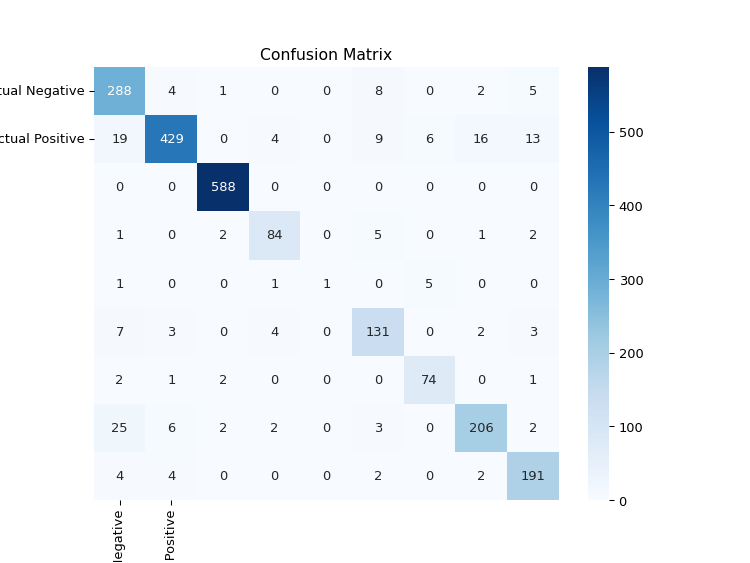

In [17]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 5- Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model= GradientBoostingClassifier(n_estimators=50)
GB_model.fit(X_train,y_train)

# Making predictions on the test set
predictions = GB_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9825206991720331


In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       308
           2       1.00      0.99      0.99       496
           3       1.00      1.00      1.00       588
           4       0.99      0.95      0.97        95
           5       0.89      1.00      0.94         8
           6       0.97      0.98      0.97       150
           7       0.99      0.97      0.98        80
           8       0.97      0.94      0.95       246
           9       0.97      1.00      0.99       203

    accuracy                           0.98      2174
   macro avg       0.97      0.98      0.97      2174
weighted avg       0.98      0.98      0.98      2174



<IPython.core.display.Javascript object>


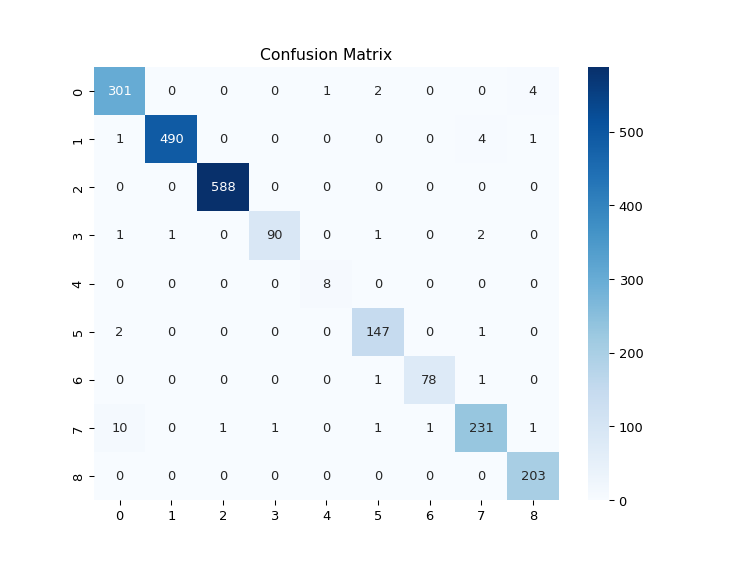

In [20]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Read Input File for ASM


In [21]:
f2 = r"C:\Users\ashut\Desktop\Machine Learning\Input\ASM_extracted.csv"
dfasm = pd.read_csv(f2)


In [22]:
dfasm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,18,22430,0,1158,1366754,0,1794,0,0,...,4371,808,2290,1281,587,701,0,15,14,456
1,02mlBLHZTDFXGa7Nt6cr,17,0,0,176,0,0,23,0,3,...,254,126,135,100,556,90,0,8,0,66
2,02MRILoE6rNhmt7FUi45,0,5372,0,606,4329,0,2349368,0,0,...,835,263,665,291,664,256,0,19,16,203
3,04BfoQRA6XEshiNuI7pF,17,2216,0,0,1061,0,1502,0,3,...,169,84,152,222,192,225,0,4,0,0
4,04sJnMaORYc1SV5pKjrP,17,1730,0,128,1070,0,211,0,3,...,120,80,123,170,150,182,0,12,0,39


In [23]:
dfLabel.rename(columns={'Id': 'ID'}, inplace=True)

In [24]:
dfasm = dfasm.merge(dfLabel, on='ID')

In [25]:
data_y = dfasm['Class']
X_train, X_test, y_train, y_test = train_test_split(dfasm.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)

# Model Building </br> </br>
## 1- Random Forest

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
random_forest.fit(X_train, y_train)

# Making predictions on the test set
predictions = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9839080459770115


<IPython.core.display.Javascript object>


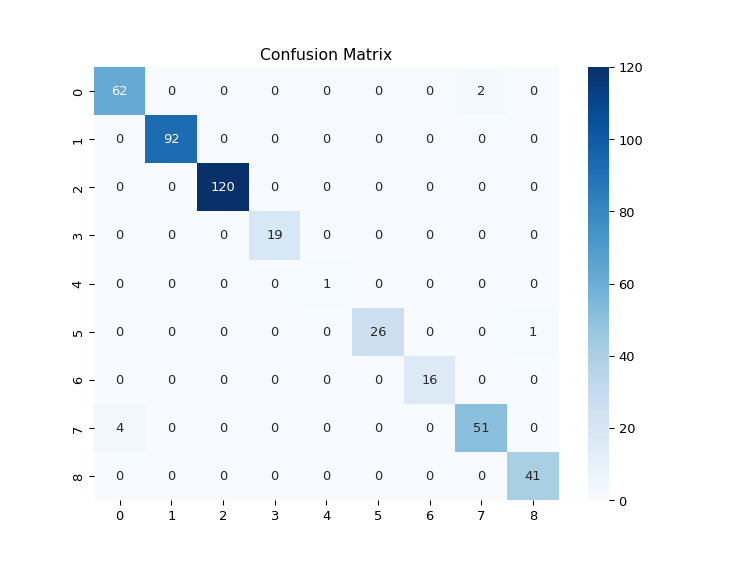

In [27]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 2- SVM

In [28]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)
predictions = SVM_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5149425287356322


<IPython.core.display.Javascript object>


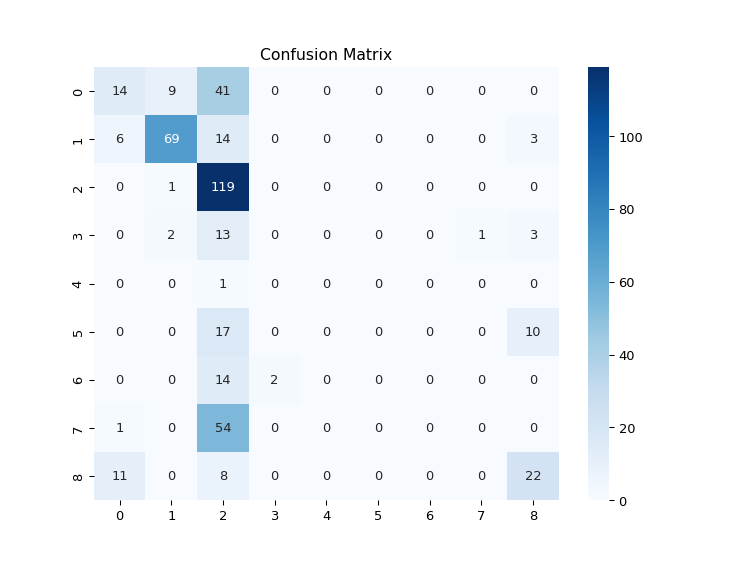

In [29]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 3- Decision Tree

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fitting the model to the training data
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
predictions = decision_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9724137931034482


<IPython.core.display.Javascript object>


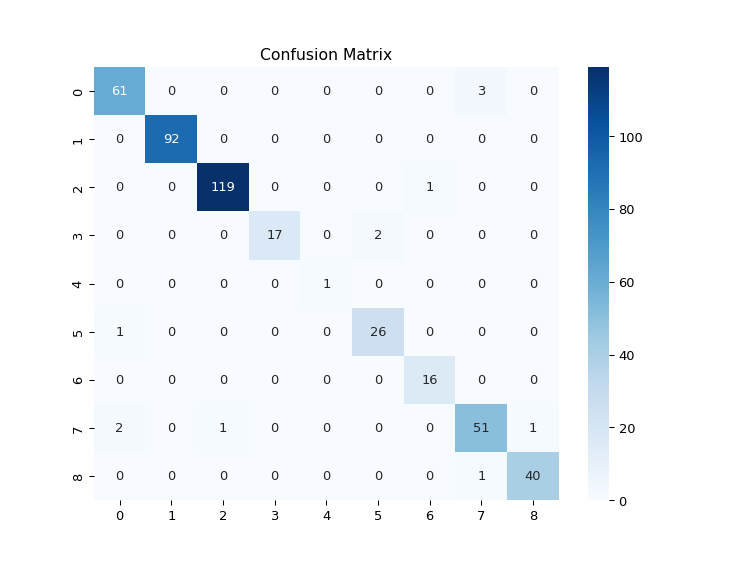

In [31]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 4- Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
#logistic_regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
logistic_regression.fit(X_train, y_train)

# Making predictions on the test set
predictions = logistic_regression.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8367816091954023


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


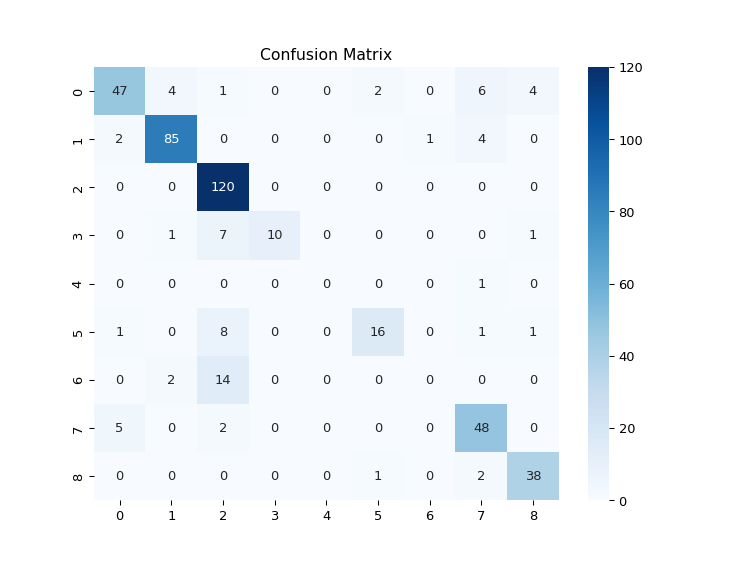

In [33]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

## 5- Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model= GradientBoostingClassifier(n_estimators=50)
GB_model.fit(X_train,y_train)

# Making predictions on the test set
predictions = GB_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9885057471264368


<IPython.core.display.Javascript object>


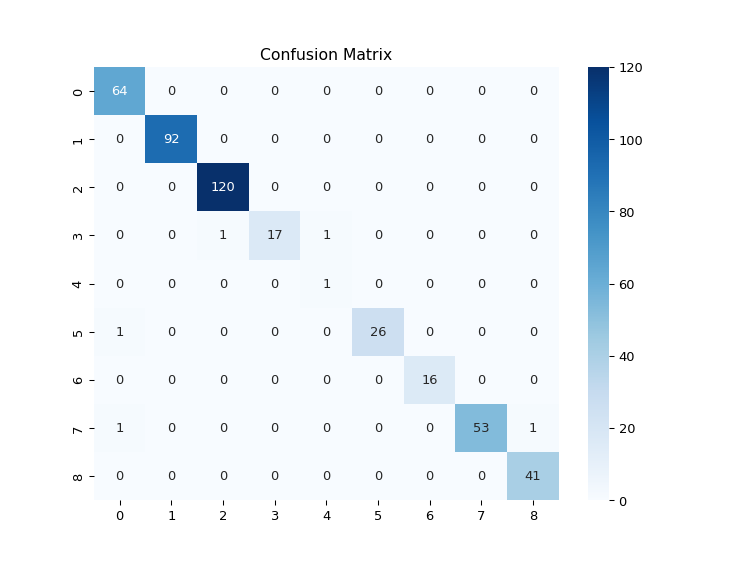

In [35]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()